# Introduction

The intensive use of applied mathematics in quantitative trading has changed this domain considerablely since the last two decades. Employing computers to perform calculations, to estimate the optimal trading quantities have improved the gain probability and give birth to a great number of quantitative hedge funds and asset management. With the operational risk in a huge banking structure, employing computers with high performance of computation gives chance to eliminate the potential loss due to bad management by simulating various "stress-test" scenarios. Indeed, with high performance of computation, one can seek for more decorrelated "alpha" strategies by "mining" the data. The machine learning (artificial intelligence) has shown a great power in many domains and will potentially take it roll in quantitative finance. 

In this note, we present briefly the various applications of quantitative approaches to the algorithmic trading and quantitative asset management. We explain the main ideas via some simple examples and illustrations without getting into any demonstration. We will start with the list of different fields of application with some general concepts and consensus adopted by many actors in this field. We next give a very basic mathematic concepts which aim to model different financial problems. Then we provide some concrete examples with their formal definition. We finish with some simulation of virtual portfolio based on simulated data.

<img src="2_no_glowing.jpg">

In [142]:
#![title](2_no_glowing.jpg)
# from IPython.display import Image
# Image('/home/tung-lam/Works/fincomp/notebook/figs/2_no_glowing.jpg')

# Basic quantitative finance

Here, we provide the basic mathematic formula in Finance which usually employed in various algorithms from pricing to trading.

The main applications that we forcus on within this text are on systematic asset management. It may concern different angles such as:

* Asset pricing
* Building alpha trading strategies based on filters and data mining
* Construction of portfolio
* Risk management

Another important part that may require a lot of computation poerformance is "low latency" execution. This part is usually masked by the "high frequency" trading domain. 

The basis of quantitative asset management and risk management is discussed in the quantitative fianance literation fully by many authors. However, I suggest here to use some important results from the two books of Thierry Roncalli which contain many detailled and usefull implementations.

## Asset Pricing
TODO

## Alpha prediction

The decision process of the trading systematic concerns two main parts: 

* finding trading signals
* combing trading signals

There are many ways to buid a systematic trading strategy but the main common factor is to employ data then learn from them the predictive patterns that may be relevent to predict the future movement of asset prices.
The two main elements of this process should be cited are:

* Data base
* Filtering and statistical learning techniques.

For the data base part, we need a first construction to clean up the data in respecting the causality criteria. For financial data, it may concern: 

* standard data such as price, volume, order books from high frequency to monthly or yearly timescale. 
* non-stardard data such as weather, satelite, trade flow, retail, internet, social network data.

For the technique part, we can profit of important toolkits from signal processing such as linear filters, non-linear filters, statistical learning.

## Portfolio construction

Once trading ideas are synthesized in the predictive signals, one may ask the following questions: 

* what is the optimal way to combine the different signals?
* what is the optimal wat to trade a portfolio of assets?

This part concerns then the optimal construction of the portfolio and has a very long history back to the time of Markowitz and the theory of Sharpe. The main optimization is to optimize the gain against the cost and under certain risk and exposure constraints.

\begin{align*}
\max & \quad Gain - Cost\\
\textrm{u.c.} & \quad Risk,\ Exposure
\end{align*}

This general problem is usually solved by an optimization program using convex optimization algorithm. The two main difficulties of this optimization program are:

* The estimation of parameters: performance, costs, risks, e.t.c
* The computation performance at high dimentionality

For example, considering a portfolio of 500 assets using 20 trading strategies, we may have $10^4$ individual timeseries of daily performance. We need then to estimate all the parameters of $10^4$ timeseries, then build an optimization for a vector of variables $\bf{w}$ of dimension $10^4$ (optimal weights for each couple asset/strategy). Runing a daily backtest over 20 years may require $5\times 10^3$ optimizations. 

## Risk management

An important part of the asset management is the risk management. This process concerns two importants points:

* How to measure or to monitor the risk? 
* How to model the crash scenario (stress test)?
* How to control the risk?

### Risk measurements

#### Volatility measurement
Here, we implement two standard volatility estimators:

* Historical volatility estimator based on simple GARCH model 
$$\sigma_t = \sqrt{Ema_T(r_t^2)}$$
where $r_t= \bf{w}_t^\top \bf{r_t}$ is the total return of the portfolio. 

* Instantaneous volatility estimator
$$\sigma_t = \sqrt{\bf{w}_t^\top \Sigma_t \bf{w}_t}$$
where $\bf{w}_t$ is the vector current position of the portfolio and $\Sigma_t=\mathbb{E}[\bf{r}_t^\top \bf{r}_t]$ is an estimator of the covariance matrix.

# Examples of Quantitative Finance

In this second part, we present some examples with simulated data of asset prices. First, we introduce price modeling using geometric Gaussian distribution with introdution of pattern via long-term trend or short-term auto-correlation. Next, we show how to use filter as a tool for building predictors. Within this example, we do not focus on how to optimize the algorithm. In the end, we buid a portfolio with a dynamic risk management.

## Modeling asset prices

Well-known model for asset price is the famous Black-Scholes:

\begin{equation}
\frac{d S_t}{S_t} = \mu_t dt + \sigma_t dB_t
\end{equation}

where $\mu_t$ is the long-term trend, $\sigma_t$ is the daily volatity and $B_t$ is a Brownian process.

In order to introduce the "alpha" into this price process, we can introduce:

* positive drift $\mu_t$
* short-term auto-correlation process instead of a Brownian process

In [1]:
# Basic imports
import pandas as pd
import basictools as bt
import cvxpy as cvx
import datetime
import json
import seaborn as sns
sns.set(color_codes=True)
from IPython.display import HTML
%pylab inline
HTML("<style>.container { width:95% !important; }</style>")

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Modeling asset prices
n_assets = 20
date_ranges = pd.date_range(datetime.datetime(1996, 1, 1), datetime.datetime(2018, 1, 1), freq='B')
n_days = len(date_ranges)
year = 252.
sigma = 0.1 / sqrt(year)
name_assets = ['asset_' + str(n + 1) for n in range(n_assets)]
mu = pd.Series(0.05 * rand(n_assets) / year, index=name_assets)
dB = pd.DataFrame(randn(n_days, n_assets), columns=name_assets, index=date_ranges)
dB = dB.ewm(0.5).mean()
dB /= dB.std() 
ret = mu + sigma * dB

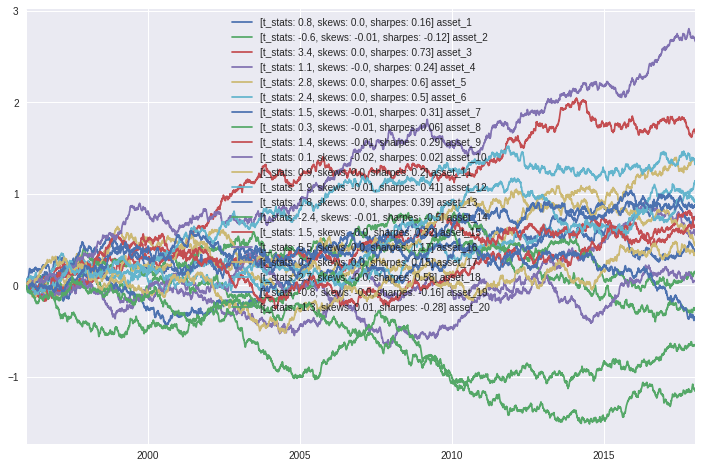

In [3]:
#
f = figure(figsize=(12, 8))
ax = f.add_subplot(111)
ret.cumsum_plot(ax=ax)

## L2 filter to predict the future price 
Let us consider a time series $y_t$ which can be decomposed by a
slowly varying trend $x_t$ and a rapidly varying noise
$\varepsilon_t$ process:
\begin{equation*}
y_t = x_t + \varepsilon_t
\end{equation*}
Let us first remind the well-known $L_2$ filter (so-called
Hodrick-Prescott filter). This scheme consists to determine the
trend $x_t$ by minimizing the following objective function:
\begin{equation*}
\frac{1}{2}\sum_{t=1}^n \left(y_t-x_t\right)^2 +
\lambda\sum_{t=2}^{n-1}\left(x_{t-1}-2x_{t}+x_{t+1}\right)^2
\end{equation*}
with $\lambda >0$ the regularization parameter which control the
competition between the smoothness of $x_t$ and the residual
$y_t-x_t$ (or the noise $\varepsilon_t$). We remark that the second
term is the discrete derivative of the trend $x_t$ which
characterizes the smoothness of the curve. Minimizing this objective
function gives a solution which is the trade-off between the data
and the smoothness of its curvature. In finance, this scheme does
not give a clear signature of the market tendency.

The Hodrick-Prescott scheme can be
rewritten in the vectorial space $\mathbb{R}^n$ and its $L_2$ norm
$\left\| \cdot \right\|_2$ as:
\begin{equation*}
\frac{1}{2}\left\|y-x\right\|_2^2+\lambda\left\|Dx\right\|_2^2
\end{equation*}
where $y=\left(y_1,\dots,y_n\right)$,
$x=\left(x_1,\dots,x_n\right)\in \mathbb{R}^n$ and the $D$ operator
is the $\left(n-2\right)\times n$ matrix:
\begin{equation}
D = \left[
\begin{array}{rrrrrrrr}
1 & -2 & 1  &         &     &    &   \\
  &  1 & -2 & 1       &     &    &   \\
  &    &    &  \ddots &     &    &   \\
  &    &    &       1 &  -2 &  1 &   \\
  &    &    &         &   1 &  2 & 1
\end{array}
\right]
\label{eq:D2}
\end{equation}
The exact solution of this estimation is given by
\begin{equation*}
x^{\star}=\left( I +2 \lambda D^{\top}D \right)^{-1}y
\end{equation*}
The explicit expression of $x^\star$ allows a very simple numerical
implementation with sparse matrix. As $L_2$ filter is a linear
filter, the regularization parameter $\lambda$ is calibrated by
comparing to the usual moving-average filter.

In [120]:
def build_L2_matrix(n_sample, lbd):
    """ Build L2 matrix
    """
    D = np.zeros((n_sample - 2,  n_sample))
    for i in range(n_sample - 2):
        for j in range(1, n_sample):
            if j==i:
                D[i,j] = 1
            if j==i+1:
                D[i, j] = -2
            if j==i+2:
                D[i, j] = 1
    I = np.diag(np.ones(n_sample))
    L = (I + 2 * lbd * np.dot(D.T, D))
    return L

    

def l2_filter(ret_sample, L):
    """ Simple implementation of L2 filter
    """
    trend = np.dot(np.linalg.inv(L), ret_sample.values)
    trend = pd.DataFrame(trend, columns=ret_sample.columns, index=ret_sample.index)
    return trend

def simple_l2_filter(ret_sample, lbd):
    """ Simple test of L2 filter
    """
    n_sample = len(ret_sample)    
    L = build_L2_matrix(n_sample, lbd)
    trend = l2_filter(ret_sample, L)
    return trend

def rolling_l2_fiter(ret, lbd, periods=250):
    """ Build rolling l2 filter
    """
    date_list = ret.index
    date_ts = pd.Series(date_list)
    trend = dict()
    L = build_L2_matrix(periods, lbd)
    for k, d in date_ts.ix[periods:].to_dict().items():
        end_date = date_ts.ix[k-1]
        start_date = date_ts.ix[k-periods]
        if mod(k - periods + 1, 250)==0:
            print 'Iteration:', k - periods + 1
            print 'today:', d
            print 'begin:', start_date
            print 'end:', end_date
        ret_sample = ret.ix[start_date:end_date]
        tmp_trend = l2_filter(ret_sample, L)
        trend[d] = tmp_trend.ix[end_date]    
    return pd.DataFrame(trend).T

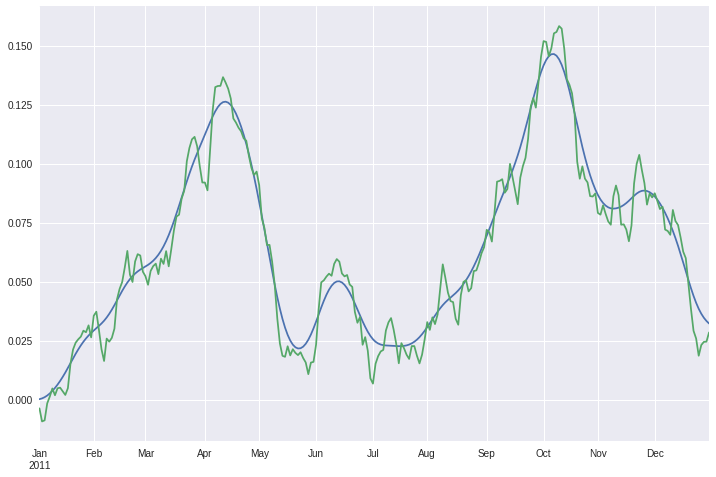

In [136]:
# Test simple one itereation
ret_sample = ret.ix['2010':]
lbd = 200.
test = simple_l2_filter(ret_sample, lbd)
f = figure(figsize=(12, 8))
test.asset_2.ix['2011'].cumsum().plot()
ret_sample.asset_2.ix['2011'].cumsum().plot()

In [137]:
# Test causal filter
test2 = %time rolling_l2_fiter(ret.ix['20100304':], lbd, 250)

Iteration: 250
today: 2012-02-01 00:00:00
begin: 2011-02-16 00:00:00
end: 2012-01-31 00:00:00
Iteration: 500
today: 2013-01-16 00:00:00
begin: 2012-02-01 00:00:00
end: 2013-01-15 00:00:00
Iteration: 750
today: 2014-01-01 00:00:00
begin: 2013-01-16 00:00:00
end: 2013-12-31 00:00:00
Iteration: 1000
today: 2014-12-17 00:00:00
begin: 2014-01-01 00:00:00
end: 2014-12-16 00:00:00
Iteration: 1250
today: 2015-12-02 00:00:00
begin: 2014-12-17 00:00:00
end: 2015-12-01 00:00:00
Iteration: 1500
today: 2016-11-16 00:00:00
begin: 2015-12-02 00:00:00
end: 2016-11-15 00:00:00
Iteration: 1750
today: 2017-11-01 00:00:00
begin: 2016-11-16 00:00:00
end: 2017-10-31 00:00:00
CPU times: user 20.8 s, sys: 10.3 s, total: 31.1 s
Wall time: 8.06 s


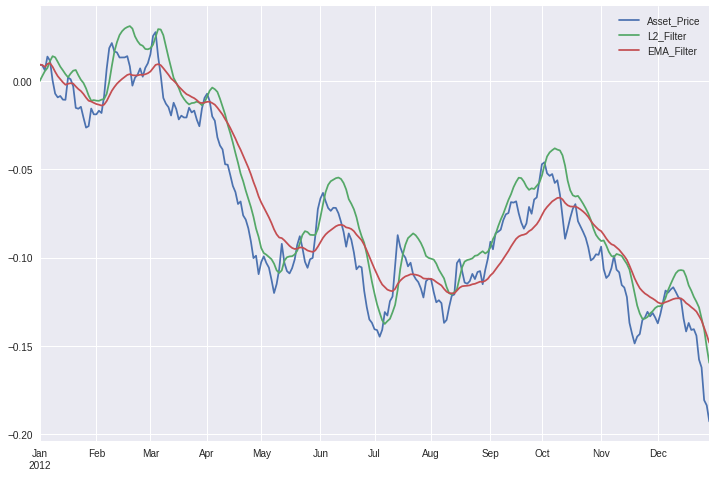

In [138]:
#
f = figure(figsize=(12, 8))
ret_sample.asset_2.ix['2012'].cumsum().plot(label='Asset_Price')
test2.asset_2.ix['2012'].cumsum().plot(label='L2_Filter')
ret_sample.asset_2.ix['2012'].cumsum().ewm(10).mean().plot(label='EMA_Filter')
legend(loc=0);

## Risk measurement

A typical example of risk metric is the VaR measurement. In this part, we provide some simple implementation of this measure based on the covariance matrix. We next apply these measurements for the portfolio simulated about.


### VaR parametric

Assuming the PnL has Gaussian distribution which depends only on the drift $\mu$ and the volatility $\sigma$

$$PnL \sim \mathcal{N}(\mu, \sigma)$$

Using this formula, we can compute the VaR by the following formula

$$VaR(\alpha) = - \mu_{PnL} + \Phi^{-1}(\alpha)\times \sigma$$

Here the VaR is the corresponding quantile for the given threshold $\alpha$ of probability of the loss distribution. Here we regenerate the result presented in Thierry Roncalli's book on Risk management (page 61-81)

### VaR with Corner-Fisher expansion

If the distribution has other characteristics such as skewness and kurtosis, we can use the Corner-Fisher expansion in order to approximate the partition function around a Gaussian limit

$$VaR(\alpha) = -\mu + z_\alpha(\gamma_1, \gamma_2) \times \sigma$$

$$z_\alpha(\gamma_1, \gamma_2) = z_\alpha + \frac{1}{6}(z_\alpha^2 - 1) \gamma_1 + \frac{1}{24}(z_\alpha^3 - 3z_\alpha)\gamma_2 - \frac{1}{36}(2z_\alpha^3 - 5z_\alpha)\gamma_1^2 + \dots$$

with $z_\alpha = \Phi^{-1}(\alpha)$ and $\gamma_1, \gamma_2$ excess of skewness and kurtosis (for Gaussian limit, skewness is zero and kurtosis is 3).

In [157]:
# Historical and Instantaneous volatility estimators
from sklearn.covariance import ledoit_wolf, oas
from scipy.stats import norm
from scipy.stats import t


def historical_volatility(pnls, time_scale):
    """ Standard historical volatility measurement
    """
    vol = (pnls ** 2).ewm(time_scale, min_periods=time_scale).mean() ** 0.5
    vol *= sqrt(252)
    return vol


def instantenous_volatility(pos, rets, time_scale, date_begin=None):
    """ HF volatility computed based on current position
    """
    if date_begin is None:
        date_begin = datetime.datetime(1985, 1, 1)
    date_list = pos.ix[date_begin:].index
    cur_vol = dict()
    for d in date_list:
        sdate = d - datetime.timedelta(time_scale)
        edate = d - datetime.timedelta(1)
        prd_rets = rets.ix[sdate:edate].drop_na_column()
        prd_stds = prd_rets.std()
        prd_rets /= prd_stds
        cov_type = 'clipped'
        if cov_type == 'clipped':
            cov_ = prd_rets.rolling(2, min_periods=0)\
                   .mean().clip(-2, 2).fillna(0).corr()
        elif cov_type == 'ledoit':
            cov_ = ledoit_wolf(prd_rets.rolling(2, min_periods=0)\
                   .mean().dropna().as_matrix(), assume_centered=False)[0]
            cov_ = pd.DataFrame(cov_, index=prd_rets.columns, 
                                columns=prd_rets.columns)
        elif cov_type == 'oas':
            cov_ = oas(prd_rets.dropna().rolling(2, min_periods=0)\
                   .mean().as_matrix(), assume_centered=False)[0]
            cov_ = pd.DataFrame(cov_, index=prd_rets.columns, 
                                columns=prd_rets.columns)
        else:
            print 'type not defined'               
        cur_pos = pos.ix[d].dropna()
        cur_pos = cur_pos.reindex_like(cov_) * prd_stds
        cur_pos = cur_pos.fillna(method='ffill').fillna(0)
        cur_vol[d] = (np.dot(cur_pos, cov_) * cur_pos).sum()
    cur_vol = pd.Series(cur_vol).replace(0, np.nan)    
    return np.sqrt(252 * cur_vol)

def var_gaussian(alpha, mu, sigma):
    """
    Measure the Gaussian VaR 
    """
    rv = norm()
    var = -mu + rv.isf(1 - alpha) * sigma
    return var

def var_t(alpha, mu, sigma, nu):
    """
    Measure the Gaussian VaR 
    """
    rv = t(nu)
    var = - mu + rv.isf(1 - alpha) * sigma * np.sqrt((nu - 1.) / nu)
    return var

def var_corner_fisher(alpha, mu, sigma, skew, kurt):
    """
    Measure the Corner-Fisger VaR 
    """
    rv = norm()
    zalpha = rv.isf(1 - alpha)
    g1 = - skew
    g2 = kurt - 3
    zg1g2 = zalpha + (zalpha**2 - 1) * g1 / 6.\
          + (zalpha**3 - 3 * zalpha) * g2 / 24.\
          - (2 * zalpha**3 - 5 * zalpha) * g1**2
    var = - mu + zg1g2 * sigma
    return var

## Markowizt portfolio

This is a typical example for asset management. In this example, we employ a simple model of optimization in assuming a linear trading cost with a quadratic volatility risk. 

Let us define $\bf{w}_t$ the vector of exposure of the set of $N$ asset/strategy. Let $\bf{p}_t$ be the prediction of the return of the given asset/strategy. The optimization problem is simple expressed as stated in the last section with the following terms:

* The performance: $\bf{w}_t^\top \bf{p}_t$
* The linear cost: $\gamma \|\Delta\bf{w}_t\|_{L_1}$
* The risk of portfolio: $\bf{w}_t^\top \Sigma \bf{w}_t$

The optimization program can be written as:
\begin{align*} 
\max_{\bf{w}}&\quad \bf{w}_t^\top \bf{p}_t - \gamma \|\Delta\bf{w}_t\|_{L_1}\\
\textrm{u.c.}&\quad \bf{w}_t^\top \Sigma \bf{w}_t \le R^2_{target}
\end{align*}

This is a typical Markowitz problem with an additional term modeling the trading cost.

### Simple backtest of the performance 


In [12]:
# Estimation of Markowitz parameters
st_scale = 20
st_preds = ret.ewm(st_scale, min_periods=st_scale).mean().shift(1)
st_preds = st_preds / st_preds.abs().ewm(250).mean()
lt_scale = 200
lt_preds = ret.ewm(lt_scale, min_periods=lt_scale).mean().shift(1)
lt_preds = lt_preds / lt_preds.abs().ewm(250).mean()
preds = bt.dict2multi_df({'TREND_LT': lt_preds, 'TREND_ST': st_preds})
risk_target = 10

In [13]:
#
spnls = preds.shift(1).mul(ret, level=1, axis=1)
tot_pnls = spnls.groupby(axis=1, level=0).sum()
tot_pnls = {c: tot_pnls[c] for c in tot_pnls.columns}
tot_pnls.update({'Long_Only': ret.sum(1)})
tot_pnls = pd.DataFrame(tot_pnls)
tot_pnls /= tot_pnls.std()
tot_pnls *= (risk_target / sqrt(256))

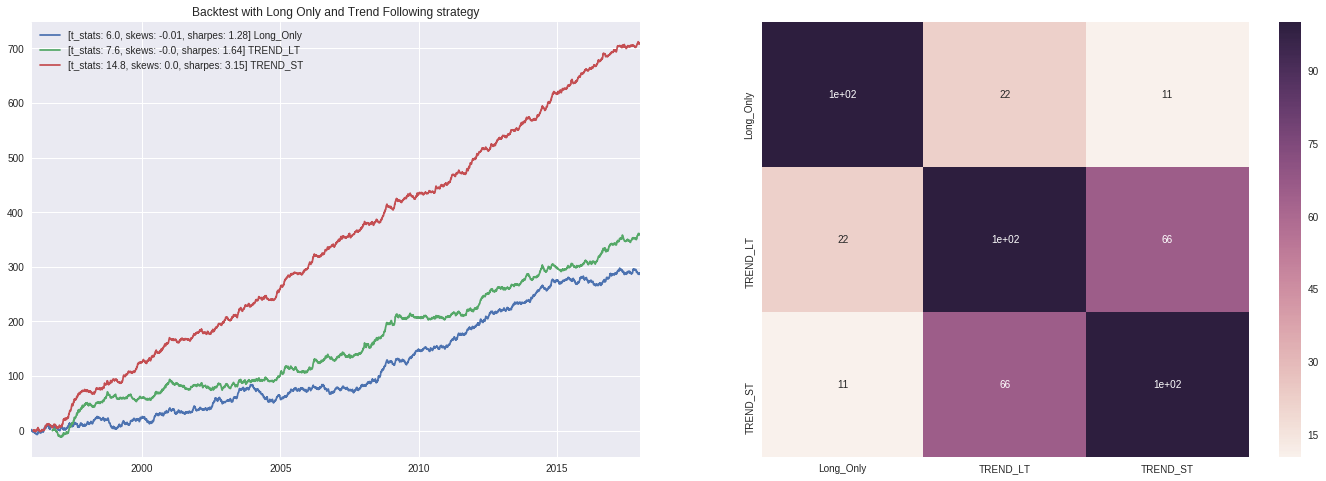

In [14]:
#
f = figure(figsize=(24, 8))
ax = f.add_subplot(121)
tot_pnls.cumsum_plot(ax=ax, 
title='Backtest with Long Only and Trend Following strategy')
ax = f.add_subplot(122)
sns.heatmap(100 * tot_pnls.corr(), annot=True, ax=ax)

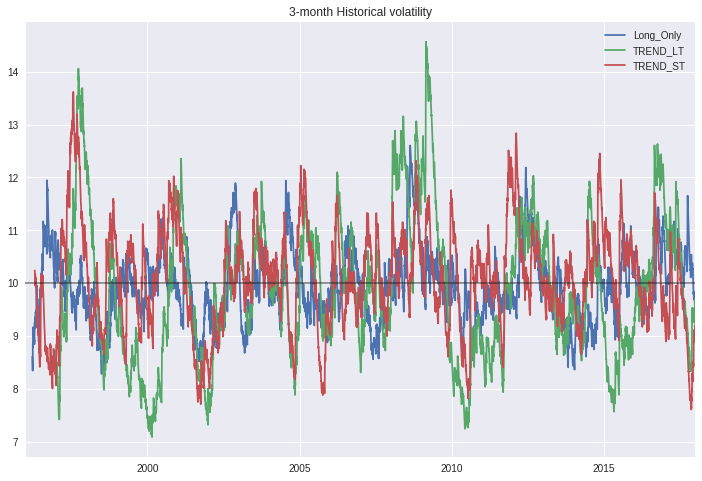

In [15]:
#
tot_vols = historical_volatility(tot_pnls, 60)
f = figure(figsize=(12, 8))
ax = f.add_subplot(111)
tot_vols.plot(ax=ax, title='3-month Historical volatility')
ax.axhline(risk_target, color='k', alpha=0.5);

### Backtest with daily optimizer

We have seen that the daily risk fluctuate a lot in the backtest. Indeed, the above "risk parity" backtest does not take into account the trading cost.

In [16]:
# Implementation of optimization problem
class DailyOptimizer(object):
    """
    Dynamic optimization in order to keep a constant risk of the portfolio
    """
    def __init__(self, gain, cost, cov, risk_target):
        """
        Constructor 
        """
        self._gain = gain
        self._lin_cost = cost
        self._cov = cov
        self._risk_target = risk_target
        self._col_list = gain.index
        self._cvx_constraints = []
    
    def _initiate_cvx_variables(self):
        """
        Initiate cvx varables
        :return:
        """
        # Declare variables
        col_len = len(self._col_list)
        self._cvx_w = cvx.Variable(col_len)
        self._cvx_gain = cvx.Parameter(col_len)
        self._cvx_lin_cost = cvx.Parameter(col_len, sign='positive')

        # Initiate variables
        self._cvx_lin_cost.value = self._lin_cost.values
        self._cvx_gain.value = self._gain.values

    def _get_optimization_problem(self):
        """
        Build optimization problem
        :return:
        """
        cvx_utility = self._cvx_w.T * self._cvx_gain \
        - cvx.abs(self._cvx_w).T * self._cvx_lin_cost
        self._cvx_objective = cvx.Maximize(cvx_utility)
    
    def _get_constraints(self):
        """
        Build constraints
        :return:
        """
        # Weight positive constraints
        self._cvx_constraints.append(self._cvx_w > 0.)

        # Risk constraints
        self._cvx_constraints.append(cvx.quad_form(self._cvx_w, self._cov.values)\
                                     <= self._risk_target ** 2)
        
    def get_allocation_weights(self):
        """
        Solve the optimization problem to obtain the optimal weights
        :return:
        """
        # Build optimization problem
        self._initiate_cvx_variables()
        self._get_optimization_problem()
        self._get_constraints()
        cvx_prob = cvx.Problem(self._cvx_objective, self._cvx_constraints)

        # Solve optimization problem
        cvx_prob.solve(solver=cvx.ECOS)
        self.optimal_weights = pd.DataFrame(self._cvx_w.value, index=self._col_list)[0]        

In [18]:
def model_multibet1(n=1, p=0.5, marge=0.05, Nb=100, N=10000):
    B = dict()
    prob = dict()
    cote_neutre = dict()
    cote_real = dict()
    for b in arange(Nb):
        g = 'asset_' + str(b)
        B[g] = dict()
        for i in arange(N):
            B[g][i] = np.random.binomial(n, p, 1)[0]
        B[g] = pd.Series(B[g])
        prob[g] = pd.Series(1.0 * np.random.binomial(100, p, N) / 100)
        cote_neutre[g] = 1 / prob[g].ewm(100).mean()
        cote_real[g] = cote_neutre[g] / (1 + marge)
    B = pd.DataFrame(B)
    cote_neutre = pd.DataFrame(cote_neutre)
    cote_real = pd.DataFrame(cote_real)
    prob = pd.DataFrame(prob)
    dBM = - (B - 1 / cote_real) 
    dS = (B - 1 / cote_neutre)
    return cote_real, cote_neutre, prob, dS, dBM

In [152]:
#
n = 1
p = 0.5
Nb = 100
N = 2500
marge = 0.05
cote_real, cote_neutre, prob, dS, dBM = model_multibet1(n, p, marge, Nb, N)

In [153]:
# Estimation of Markowitz parameters
B = dS + 1 / cote_neutre
prob_estimate = B.ewm(200, min_periods=100).mean()
mu = (prob_estimate - 1 / cote_neutre)
sigma2 = (cote_neutre - 1) / cote_neutre ** 2 
lin_cost = marge / cote_neutre
risk_target = 10

In [154]:
# Test allocation
def daily_loop(mu, sigma2, lin_cost, risk_target):
    opt_pred = dict()
    for idx in array(mu.index)[250:]:
        cov = pd.DataFrame(np.diag(sigma2.ix[idx]), index=sigma2.columns, columns=sigma2.columns)
        alloc = DailyOptimizer(mu.ix[idx], 0.5 * lin_cost.ix[idx], cov, risk_target)
        alloc.get_allocation_weights()
        opt_pred[idx] = alloc.optimal_weights
    opt_pred = pd.DataFrame(opt_pred).T    
    return opt_pred

opt_pred = %time daily_loop(mu, sigma2, lin_cost, risk_target)
pnl = opt_pred * dS.ix[250:]
cost = opt_pred.abs() * marge / cote_neutre.ix[250:]
dBV = pnl - cost

CPU times: user 24 s, sys: 6.68 s, total: 30.7 s
Wall time: 15.4 s


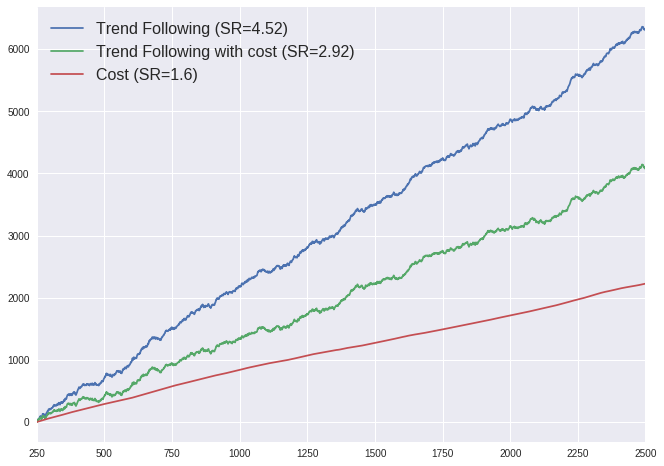

In [70]:
#
fig = figure(figsize=(24, 8))
ax = fig.add_subplot(121)
pnl.sum(1).cumsum().plot(ax=ax, label='Trend Following (SR=' + str(round(pnl.sum(1).sharpe, 2)) + ')')
dBV.sum(1).cumsum().plot(ax=ax, label='Trend Following with cost (SR=' + str(round(dBV.sum(1).sharpe, 2)) + ')')
cost.sum(1).cumsum().plot(ax=ax, label='Cost (SR=' + str(round(pnl.sum(1).sharpe - dBV.sum(1).sharpe, 2)) + ')')
legend(loc=0, fontsize=16);

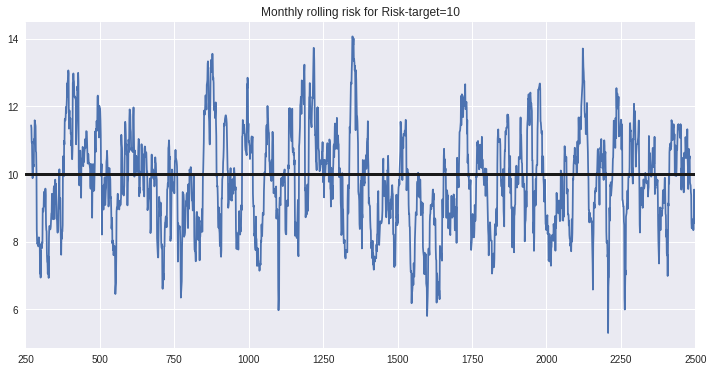

In [155]:
#
fig = figure(figsize=(12, 6))
ax = fig.add_subplot(111)
pnl.sum(1).rolling(20).std().plot(ax=ax, title='Monthly rolling risk for Risk-target=' + str(risk_target))
ax.axhline(10, color='k', linewidth=3);

# Conclusions

In this note, we give a very brief review of the application of optimization for building a systematic trading. The process is composed by differents steps including:
* buiding predictors to detect market anomalies
* constructing portfolio with dynamic risk management
* backtesting and risk monitoring
For illustration, we show and example with simulated daa where the dimension can of asset and strategy can grow to the order of $10^4$. Via this example, we show how the computing performance is important for research and production.